# Student Score Prediction
## 📌 Task Overview
This project aims to predict students' final exam scores based on their study hours using regression models. The objective is to build, train, and evaluate both a Linear Regression and Polynomial Regression model, then compare their performances.

## 🧰 Tools & Libraries
Python

Pandas – for data handling

Matplotlib & Seaborn – for visualization

Scikit-learn – for model building and evaluation

## Required Imports

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import  make_scorer , mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [7]:
import warnings
warnings.filterwarnings('ignore')

 ## Load the Dataset

In [9]:
df = pd.read_csv("StudentPerformanceFactors.csv")
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


## 📊 Exploratory Data Analysis (EDA) with Pandas
In this section, we explore the structure, quality, and summary of the dataset using Pandas.

In [10]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [11]:
# see how much data DataSet contains
print(len(df))
print(df.shape)

6607
(6607, 20)


## The output:

(6607, 20)
means that Our dataset has:

* 6607 rows → Each row represents one student (or one data entry).

* 20 columns → Each column is a feature or attribute, such as gender, study time, or score.

## Displaying Data Types
The first step in getting to know your data is to discover the different data types it contains.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

## Showing Basics Statistics
Now that you’ve seen what data types are in your dataset, it’s time to get an overview of the values each column contains

In [13]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


## Check for Missing Values

In [14]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

## Unique Values in Each Column

In [15]:
df.nunique()

Hours_Studied                 41
Attendance                    41
Parental_Involvement           3
Access_to_Resources            3
Extracurricular_Activities     2
Sleep_Hours                    7
Previous_Scores               51
Motivation_Level               3
Internet_Access                2
Tutoring_Sessions              9
Family_Income                  3
Teacher_Quality                3
School_Type                    2
Peer_Influence                 3
Physical_Activity              7
Learning_Disabilities          2
Parental_Education_Level       3
Distance_from_Home             3
Gender                         2
Exam_Score                    45
dtype: int64

## Handling Missing Data
To maintain data consistency and avoid loss of valuable records, missing values are filled using the most frequent (mode) value for each affected column. This approach is suitable for categorical variables.

* Strategy:
Replace missing values in:
1. Teacher_Quality
1. Parental_Education_Level
1. Distance_from_Home

Use .fillna() with the column's mode.

In [16]:
df.fillna({
    'Teacher_Quality' : df['Teacher_Quality'].mode()[0],
    'Parental_Education_Level' : df['Parental_Education_Level'].mode()[0],
    'Distance_from_Home' : df['Distance_from_Home'].mode()[0]
    } , inplace=True)

In [17]:
print(df.isnull().sum())

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


In [18]:
df.sort_values(by = "Exam_Score" , ascending=False).head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
1525,27,98,Low,Medium,Yes,6,93,Low,No,5,High,High,Public,Positive,3,No,High School,Moderate,Female,101
94,18,89,High,Medium,Yes,4,73,Medium,Yes,3,High,Medium,Private,Positive,2,No,College,Near,Female,100
3579,14,90,High,High,Yes,8,86,Medium,Yes,4,Medium,Medium,Private,Negative,2,No,High School,Near,Female,99
2425,23,83,High,High,Yes,4,89,Low,Yes,1,Medium,Medium,Public,Negative,3,No,High School,Far,Male,99
4192,28,90,Low,Medium,Yes,9,91,Medium,Yes,0,Medium,Medium,Public,Positive,2,No,College,Moderate,Female,98


## Calculate IQR for Exam_Score

In [19]:
Q1 = df['Exam_Score'].quantile(0.25)
Q3 = df['Exam_Score'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 2 * IQR
upper_bound = Q3 + 2 * IQR

In [20]:
df_no_outliers = df[(df['Exam_Score'] > lower_bound) & (df['Exam_Score'] <= upper_bound)]

## 📊 Data Visualization
This section explores how different student-related factors affect the Exam_Score.

## 1- Exam Score Distribution (Histogram) using pandas
This histogram displays the distribution of student exam scores. It provides a clear view of how the scores are spread across the dataset.

* The x-axis represents exam score ranges, divided into 30 bins.

* The y-axis shows the frequency, or how many students fall within each score range.

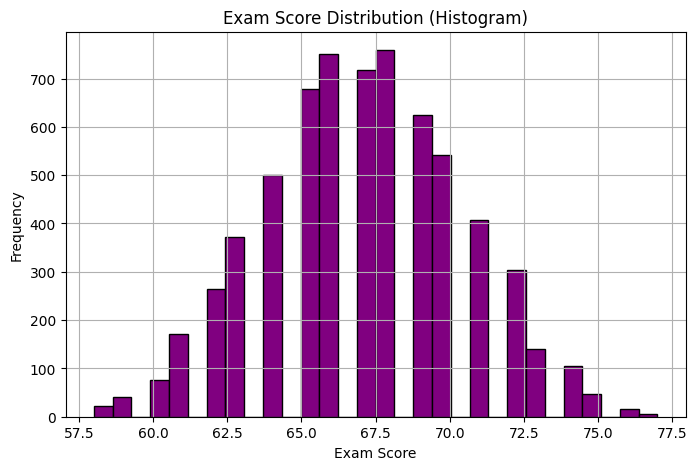

In [21]:
df_no_outliers['Exam_Score'].plot.hist(bins=30, color='purple', edgecolor='black', figsize=(8,5))
plt.title('Exam Score Distribution (Histogram)')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## 2- Seaborn Regression Plot (with Trend Line)

Shows how exam scores change with study hours.
Adds a trend line for each gender to compare patterns.
Useful to see if studying more improves scores.

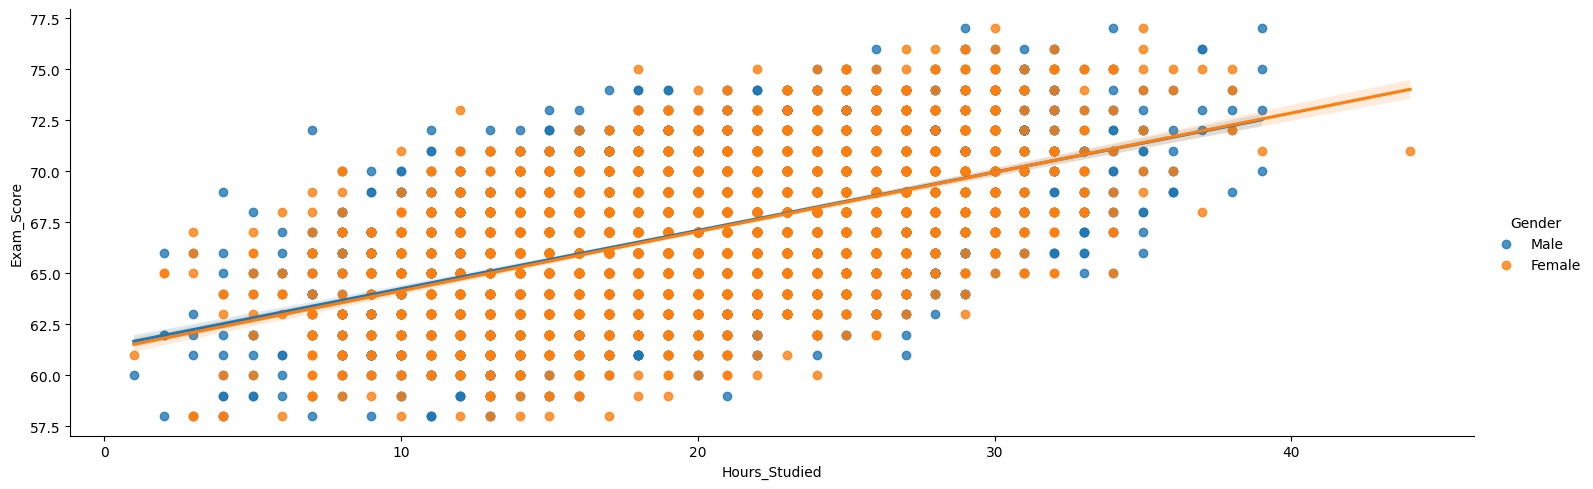

In [22]:
sns.lmplot(data=df_no_outliers, x='Hours_Studied', y='Exam_Score', hue='Gender' , aspect = 3)

## 3- Line Plots: Average Exam Score by Attendance and Previous Scores

These line plots show the average exam scores based on:
* Left Plot: Student attendance percentage
* Right Plot: Previous academic scores

The trends help identify how increased attendance and past performance may lead to higher exam scores.

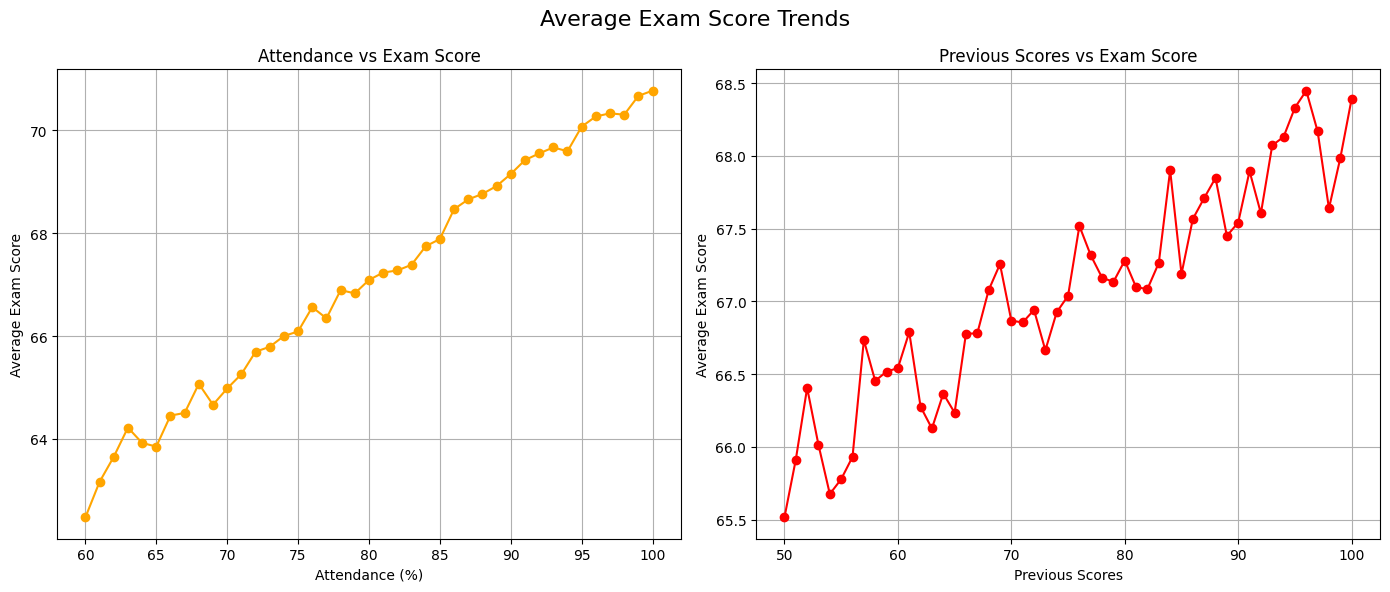

In [23]:
# Group by Attendance and Previous Scores to get average Exam Score
attendance_avg = df_no_outliers.groupby('Attendance')['Exam_Score'].mean().sort_index()
previous_avg = df_no_outliers.groupby('Previous_Scores')['Exam_Score'].mean().sort_index()

#Set Up subplots
fig, axes = plt.subplots(1,2 , figsize=(14, 6))
fig.suptitle('Average Exam Score Trends', fontsize=16)

# Line Plot 1: Attendance vs Exam Score
attendance_avg.plot(ax=axes[0] , kind='line' , color='orange' , marker='o')
axes[0].set_title('Attendance vs Exam Score')
axes[0].set_xlabel('Attendance (%)')
axes[0].set_ylabel('Average Exam Score')
axes[0].grid(True)

# Line Plot 2: Previous Scores vs Exam Score
previous_avg.plot(ax=axes[1], kind='line', color='red', marker='o')
axes[1].set_title('Previous Scores vs Exam Score')
axes[1].set_xlabel('Previous Scores')
axes[1].set_ylabel('Average Exam Score')
axes[1].grid(True)

plt.tight_layout()
plt.show()


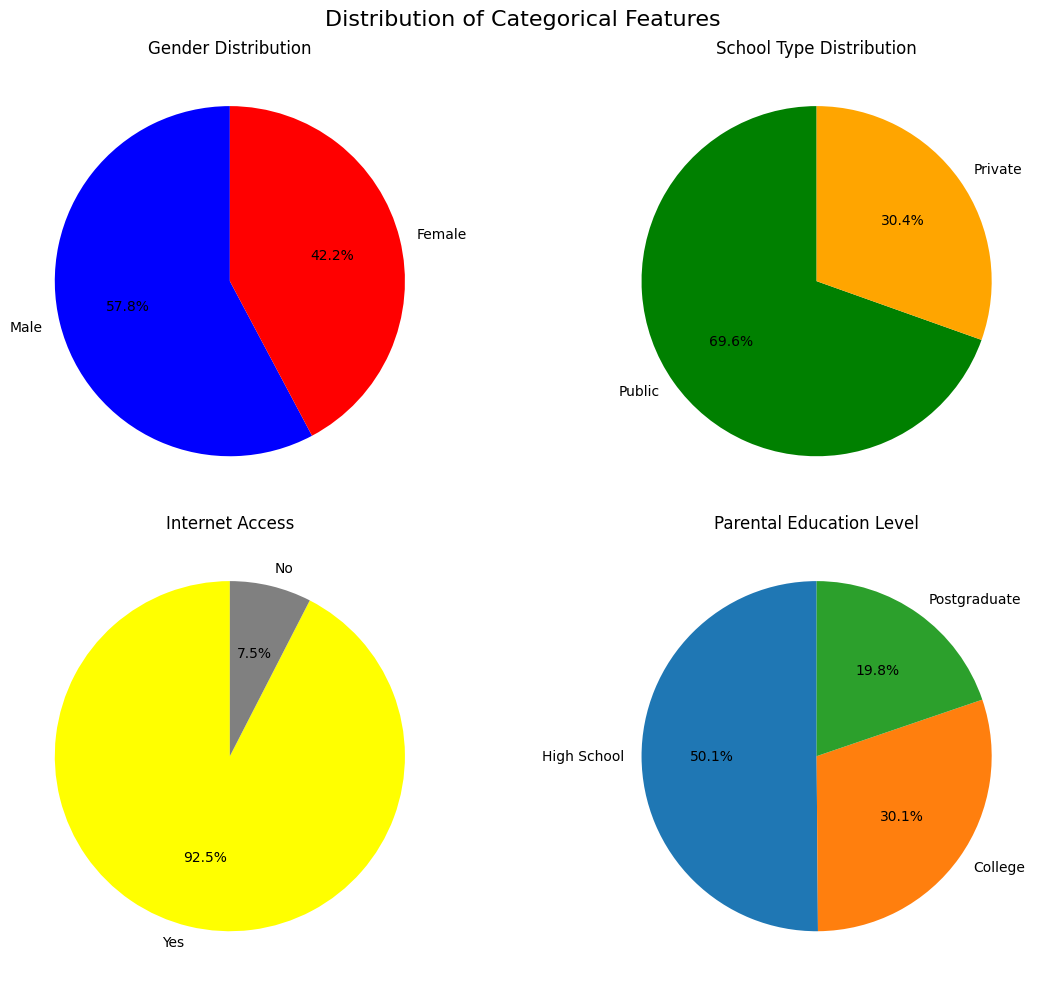

In [24]:
import matplotlib.pyplot as plt

# Set up a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Distribution of Categorical Features', fontsize=16)

# Plot 1: Gender
df_no_outliers['Gender'].value_counts().plot.pie(
    ax=axes[0, 0],
    autopct='%1.1f%%',
    startangle=90,
    colors=['blue', 'red'],
    title='Gender Distribution'
)
axes[0, 0].set_ylabel('')

# Plot 2: School Type
df_no_outliers['School_Type'].value_counts().plot.pie(
    ax=axes[0, 1],
    autopct='%1.1f%%',
    startangle=90,
    colors=['green', 'orange'],
    title='School Type Distribution'
)
axes[0, 1].set_ylabel('')

# Plot 3: Internet Access
df_no_outliers['Internet_Access'].value_counts().plot.pie(
    ax=axes[1, 0],
    autopct='%1.1f%%',
    startangle=90,
    colors=['yellow', 'gray'],
    title='Internet Access'
)
axes[1, 0].set_ylabel('')

# Plot 4: Parental Education Level
df_no_outliers['Parental_Education_Level'].value_counts().plot.pie(
    ax=axes[1, 1],
    autopct='%1.1f%%',
    startangle=90,
    title='Parental Education Level'
)
axes[1, 1].set_ylabel('')

# Adjust layout
plt.tight_layout()
plt.show()


## Correlation Matrix for Numerical Features

In [25]:
df_orginal = df.copy()

# Applying one-hot encoding
df_encoded = pd.get_dummies(df_no_outliers ,dtype=int)
# Displaying the encoded DataFrame
print(df_encoded)

      Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  \
0                23          84            7               73   
1                19          64            8               59   
2                24          98            7               91   
3                29          89            8               98   
4                19          92            6               65   
...             ...         ...          ...              ...   
6602             25          69            7               76   
6603             23          76            8               81   
6604             20          90            6               65   
6605             10          86            6               91   
6606             15          67            9               94   

      Tutoring_Sessions  Physical_Activity  Exam_Score  \
0                     0                  3          67   
1                     2                  4          61   
2                     2                  4   

In [26]:
df_encoded.corr()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_High,Parental_Involvement_Low,Parental_Involvement_Medium,...,Learning_Disabilities_No,Learning_Disabilities_Yes,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Far,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Female,Gender_Male
Hours_Studied,1.000000,-0.017761,0.008706,0.021684,-0.018681,0.003234,0.516124,-0.016792,0.014568,0.003510,...,0.012069,-0.012069,-0.012280,0.012474,-0.001516,0.009125,0.008965,-0.013960,0.000769,-0.000769
Attendance,-0.017761,1.000000,-0.015907,-0.023902,0.011440,-0.024033,0.677102,-0.002730,0.014084,-0.008840,...,0.018588,-0.018588,-0.000134,-0.021187,0.026754,-0.014002,-0.006122,0.014267,-0.010403,0.010403
Sleep_Hours,0.008706,-0.015907,1.000000,-0.020586,-0.011664,-0.000947,-0.012614,-0.005721,0.007462,-0.000811,...,-0.013857,0.013857,0.006485,-0.009416,0.004351,-0.007389,0.007081,-0.002135,0.007393,-0.007393
Previous_Scores,0.021684,-0.023902,-0.020586,1.000000,-0.013336,-0.011209,0.201504,-0.015461,0.022275,-0.003887,...,-0.010499,0.010499,-0.017431,0.016932,-0.001179,0.003353,-0.010838,0.008115,-0.002455,0.002455
Tutoring_Sessions,-0.018681,0.011440,-0.011664,-0.013336,1.000000,0.016389,0.178182,0.000613,0.008469,-0.007359,...,-0.009775,0.009775,0.003044,-0.005950,0.003964,-0.010871,-0.010865,0.016805,0.004393,-0.004393
Physical_Activity,0.003234,-0.024033,-0.000947,-0.011209,0.016389,1.000000,0.045274,-0.005981,-0.001330,0.006487,...,-0.016419,0.016419,-0.005754,0.025884,-0.025869,-0.009534,0.005014,0.001109,-0.006240,0.006240
Exam_Score,0.516124,0.677102,-0.012614,0.201504,0.178182,0.045274,1.000000,0.155124,-0.136855,-0.030598,...,0.107888,-0.107888,0.017945,-0.106436,0.112959,-0.083160,-0.047756,0.095415,-0.007812,0.007812
Parental_Involvement_High,-0.016792,-0.002730,-0.005721,-0.015461,0.000613,-0.005981,0.155124,1.000000,-0.320183,-0.648741,...,-0.009847,0.009847,0.014799,-0.006952,-0.008318,-0.010954,0.007309,-0.000177,0.023664,-0.023664
Parental_Involvement_Low,0.014568,0.014084,0.007462,0.022275,0.008469,-0.001330,-0.136855,-0.320183,1.000000,-0.513231,...,0.000301,-0.000301,0.007169,-0.010741,0.005227,0.007686,0.004489,-0.008889,-0.002793,0.002793
Parental_Involvement_Medium,0.003510,-0.008840,-0.000811,-0.003887,-0.007359,0.006487,-0.030598,-0.648741,-0.513231,1.000000,...,0.008679,-0.008679,-0.019165,0.014926,0.003337,0.003750,-0.010228,0.007301,-0.019194,0.019194


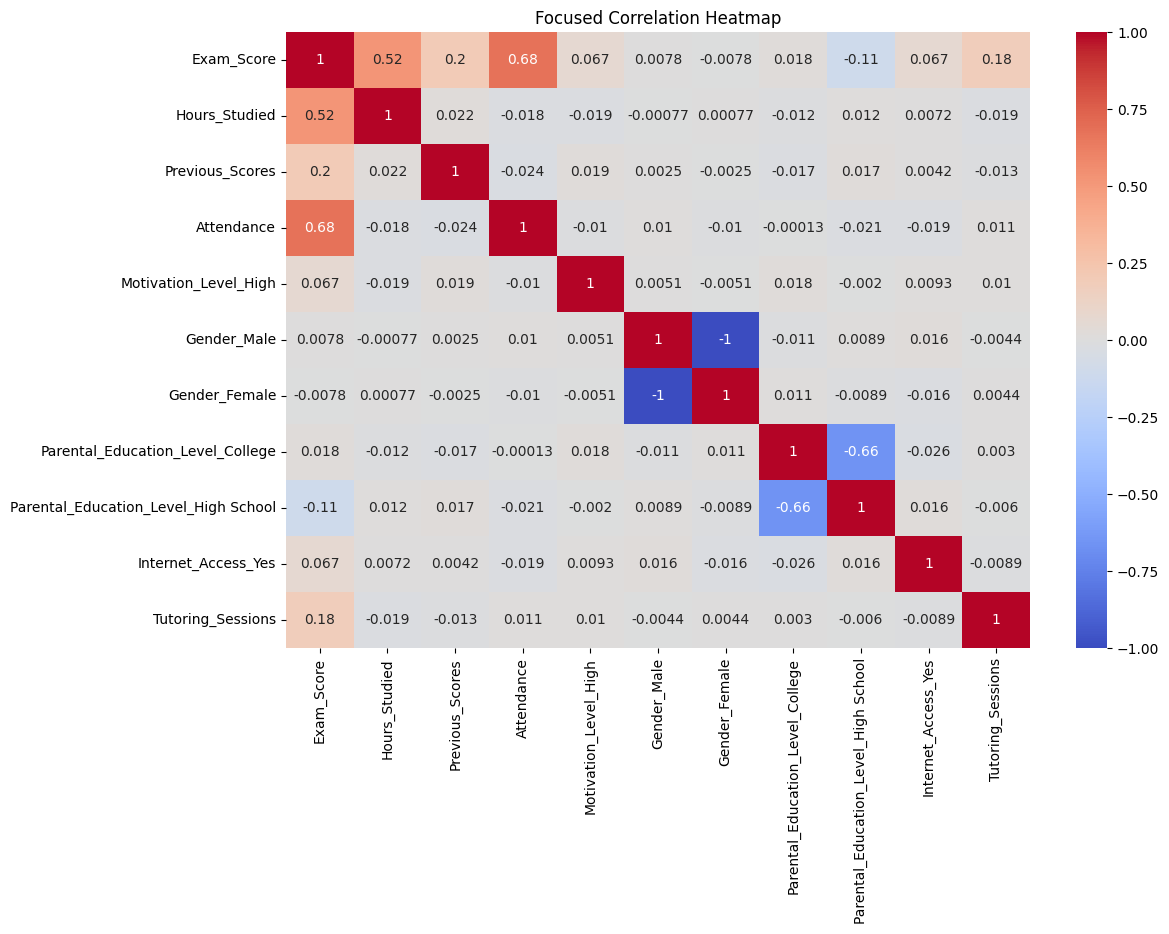

In [27]:
# Select subset with only 11 columns including the target
subset = df_encoded[['Exam_Score', 'Hours_Studied', 'Previous_Scores', 'Attendance', 
                     'Motivation_Level_High', 'Gender_Male', 'Gender_Female', 'Parental_Education_Level_College', 
                     'Parental_Education_Level_High School', 'Internet_Access_Yes', 
                     'Tutoring_Sessions']]

plt.figure(figsize=(12, 8))
sns.heatmap(subset.corr(), annot=True, cmap='coolwarm')
plt.title("Focused Correlation Heatmap")
plt.show()

## Feature Selection for Regression
Goal: Select features that are most predictive of Exam_Score.

In [28]:
correlation = df_encoded.corr()['Exam_Score'].sort_values(ascending=False)

# Show top 22 correlated features (excluding 'Exam_Score' itself)
top_features = correlation[1:22]
print(top_features)

Attendance                               0.677102
Hours_Studied                            0.516124
Previous_Scores                          0.201504
Tutoring_Sessions                        0.178182
Access_to_Resources_High                 0.161901
Parental_Involvement_High                0.155124
Parental_Education_Level_Postgraduate    0.112959
Learning_Disabilities_No                 0.107888
Distance_from_Home_Near                  0.095415
Peer_Influence_Positive                  0.090912
Teacher_Quality_High                     0.076036
Family_Income_High                       0.073945
Internet_Access_Yes                      0.067087
Motivation_Level_High                    0.067046
Extracurricular_Activities_Yes           0.066743
Physical_Activity                        0.045274
Motivation_Level_Medium                  0.030607
Family_Income_Medium                     0.029009
Parental_Education_Level_College         0.017945
School_Type_Private                      0.015237


## Now We can use only these top features in our model:
Define Features (X) and Target (y)

In [29]:
selected_features = top_features.index.tolist()
X = df_encoded[selected_features]
y = df_encoded['Exam_Score']

## Split the Dataset

In [30]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state = 42)

## Standardization (Z-score normalization)

In [31]:
# Select only numeric continuous columns to scale
cols_to_scale = ['Hours_Studied', 'Attendance', 'Previous_Scores']

scaler = StandardScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

## Train a Linear Regression Model

In [32]:
model = LinearRegression()
model.fit(X_train , y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Make Predictions

In [33]:
y_pred = model.predict(X_test)

## Evaluate the Model

In [34]:
print("Mean Squared Error (MSE):" , mean_squared_error(y_test , y_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error (MSE): 0.4650414266237679
Mean Absolute Error (MAE): 0.5572980466662601
R² Score: 0.9578187619796749


## Create the Comparison DataFrame

In [35]:
comparsion_df_linear = pd.DataFrame({
    'Actual_Exam_Score' : y_test.values,
    'Predicted_Exam_Score' : y_pred
})

print(comparsion_df_linear.head(10))

   Actual_Exam_Score  Predicted_Exam_Score
0                 68             68.783046
1                 64             63.468631
2                 71             70.287521
3                 64             65.228232
4                 66             66.289916
5                 66             65.196656
6                 69             69.427405
7                 68             68.674594
8                 62             62.010628
9                 71             71.448758


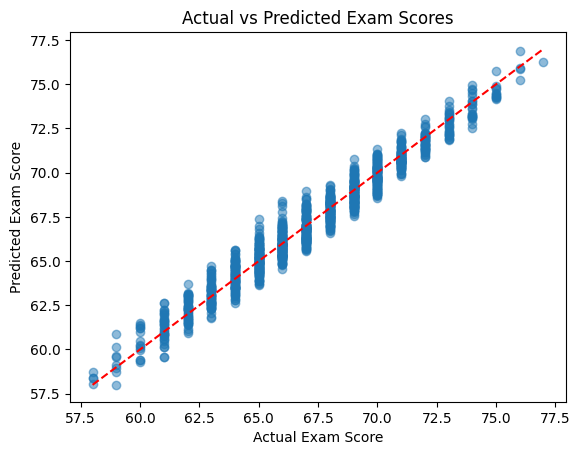

In [36]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs Predicted Exam Scores")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--' , label='Perfect Prediction')  # Ideal line
plt.show()

## Cross-Validation Results for Each Fold

In [37]:
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

cv_folds = 5

mse_scores = cross_val_score(model, X, y, cv=cv_folds, scoring=mse_scorer)
print("MSE per fold:", -mse_scores)

mae_scores = cross_val_score(model, X, y, cv=cv_folds, scoring=mae_scorer)
print("MAE per fold:", -mae_scores)

r2_scores = cross_val_score(model, X, y, cv=cv_folds, scoring=r2_scorer)
print("R² per fold:", r2_scores)

MSE per fold: [0.49016393 0.44097748 0.488174   0.4639721  0.47055368]
MAE per fold: [0.56523934 0.53460025 0.56928229 0.55532495 0.55580189]
R² per fold: [0.95153101 0.96046431 0.95656676 0.95827715 0.95886019]


## polynomial regression

In [41]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_pred_poly = poly_model.predict(X_test_poly)

print("R² Score (Polynomial Degree 2):", r2_score(y_test, y_pred_poly))

R² Score (Polynomial Degree 2): 0.9566515047978049
